In [25]:
from datetime import datetime

import pandas
import matplotlib.pyplot as plt

In [36]:
scorelog = pandas.read_csv('PolyGenStats-vinzenz-scorelog.csv', sep=',', dtype={'score': int, 'sourcename': str, 'name': str, 'mapx': int, 'mapy': int}, parse_dates=['when'], date_format='%d/%m/%Y %H:%M')
scorelog

when  score    sourcename                  name  mapx  mapy
0   2025-08-08 20:14:00    100   First Visit             Info Desk   216   505
1   2025-08-08 20:19:00    282       Capture             Info Desk   216   505
2   2025-08-08 20:20:00     58       Capture             Info Desk   216   505
3   2025-08-08 20:22:00    100   First Visit              Main Bar   190   570
4   2025-08-08 20:23:00    100   First Visit            Badge Tent   328   607
..                  ...    ...           ...                   ...   ...   ...
896 2025-08-12 13:34:00     91       Capture                    0E     0     0
897 2025-08-12 13:39:00     50         Visit              Pixelbar   379   602
898 2025-08-12 13:42:00    164  Output Boost             Site Sign   207   874
899 2025-08-12 13:50:00    694       Capture              Pixelbar   379   602
900 2025-08-12 14:00:00    284  Output Boost  Maker Days Eindhoven   115   749

[901 rows x 6 columns]

In [27]:
summary = pandas.read_csv('PolyGenStats-vinzenz-summary.csv', sep=',', dtype={'name': str, 'totalvisits': int, 'captures': int, 'totalheldduration': int, 'maxheldduration': int})
summary

name  totalvisits  captures  totalheldduration  \
0                     Site Sign           15        21              61707   
1          Maker Days Eindhoven           13        10              61044   
2                      Pixelbar           18        17              51151   
3                    Cold North           17        20              49590   
4                   Karaoke Bar           19        16              44169   
5             CoderDojo Belgium           15        13              42973   
6                 Entrance Arch           19        18              40416   
7                      Main Bar           42        67              33999   
8                    Badge Tent           21        21              31452   
9   Bridge over troubled waters           28        28              27990   
10                     BornHack            8         5              16419   
11                    Info Desk           19        23              13685   
12            PolyGen Home Base           18        17              12688   
13                    Milliways           23        47               9763   
14                    Party Bar           12        11               9251   
15                       Heaven           15         9               8980   
16              Chaos Mauldasch           21        30               7426   
17                        Adyen           24        22               7007   
18             Tilde Industries            5         4               6215   
19                     Geraffel            9         6               5286   
20            Food Hacking Base           16        13               4427   
21  Rose Island Italian Embassy            9         7               3667   
22                        FALSE            7         5               2798   
23                       Matrix            7         6               2251   
24                           0E            1         1                 91   

    maxheldduration  
0             46380  
1             44313  
2             36261  
3             22971  
4             23180  
5             23237  
6             28498  
7             16913  
8             18329  
9             18829  
10             7753  
11             3304  
12             5316  
13             3386  
14             7694  
15             3756  
16             1394  
17             3483  
18             3365  
19             1782  
20              993  
21             1258  
22             1969  
23             1096  
24               91

In [28]:
summary = pandas.merge(summary, scorelog[scorelog['sourcename'] == 'First Visit'][['name', 'mapx', 'mapy', 'when']], on='name')
summary = pandas.merge(summary, scorelog[['name', 'score']].groupby('name').sum(), on='name', validate='1:1')
summary.rename(columns={'when': 'first_visit', 'score': 'total_score'}, inplace=True)

summary

name  totalvisits  captures  totalheldduration  \
0                     Site Sign           15        21              61707   
1          Maker Days Eindhoven           13        10              61044   
2                      Pixelbar           18        17              51151   
3                    Cold North           17        20              49590   
4                   Karaoke Bar           19        16              44169   
5             CoderDojo Belgium           15        13              42973   
6                 Entrance Arch           19        18              40416   
7                      Main Bar           42        67              33999   
8                    Badge Tent           21        21              31452   
9   Bridge over troubled waters           28        28              27990   
10                     BornHack            8         5              16419   
11                    Info Desk           19        23              13685   
12            PolyGen Home Base           18        17              12688   
13                    Milliways           23        47               9763   
14                    Party Bar           12        11               9251   
15                       Heaven           15         9               8980   
16              Chaos Mauldasch           21        30               7426   
17                        Adyen           24        22               7007   
18             Tilde Industries            5         4               6215   
19                     Geraffel            9         6               5286   
20            Food Hacking Base           16        13               4427   
21  Rose Island Italian Embassy            9         7               3667   
22                        FALSE            7         5               2798   
23                       Matrix            7         6               2251   
24                           0E            1         1                 91   

    maxheldduration  mapx  mapy         first_visit  score  
0             46380   207   874 2025-08-08 22:12:00  63688  
1             44313   115   749 2025-08-08 22:28:00  62440  
2             36261   379   602 2025-08-09 00:42:00  52601  
3             22971   305   402 2025-08-08 21:56:00  50757  
4             23180   292   446 2025-08-08 21:55:00  45272  
5             23237    34   523 2025-08-08 21:39:00  44374  
6             28498   240   916 2025-08-08 22:10:00  41486  
7             16913   190   570 2025-08-08 20:22:00  36884  
8             18329   328   607 2025-08-08 20:23:00  32599  
9             18829   251   553 2025-08-09 02:28:00  29550  
10             7753    82   337 2025-08-10 19:51:00  17711  
11             3304   216   505 2025-08-08 20:14:00  17026  
12             5316   322   591 2025-08-09 17:52:00  14376  
13             3386    95   498 2025-08-09 17:07:00  11003  
14             7694    67   289 2025-08-08 22:54:00  13340  
15             3756   183   227 2025-08-08 21:46:00  10057  
16             1394   164   635 2025-08-08 22:37:00   8564  
17             3483   120   637 2025-08-08 22:34:00   8281  
18             3365   361   468 2025-08-11 17:42:00   6515  
19             1782   188   166 2025-08-08 23:03:00   6899  
20              993   119   571 2025-08-10 18:31:00   5308  
21             1258    41   475 2025-08-10 04:12:00   4167  
22             1969   163   425 2025-08-08 23:17:00   3863  
23             1096   164   731 2025-08-11 15:33:00   2696  
24               91     0     0 2025-08-12 13:32:00    191

In [29]:
boosts = scorelog[scorelog['sourcename'] == 'Output Boost'][['name', 'score']].groupby('name')

total_boosts = boosts.sum()
total_boosts['totalboostduration'] = total_boosts['score'].apply(lambda x: 10 * x)
total_boosts.rename(columns={'score': 'totalboostscore'}, inplace=True)
summary = pandas.merge(summary, total_boosts, on='name')
del total_boosts

max_boosts = boosts.max()
max_boosts['maxboostduration'] = max_boosts['score'].apply(lambda x: 10 * x)
max_boosts.rename(columns={'score': 'maxboostscore'}, inplace=True)
summary = pandas.merge(summary, max_boosts, on='name')
del max_boosts

del boosts
summary

name  totalvisits  captures  totalheldduration  \
0                     Site Sign           15        21              61707   
1          Maker Days Eindhoven           13        10              61044   
2                    Cold North           17        20              49590   
3                   Karaoke Bar           19        16              44169   
4             CoderDojo Belgium           15        13              42973   
5                 Entrance Arch           19        18              40416   
6                      Main Bar           42        67              33999   
7                    Badge Tent           21        21              31452   
8   Bridge over troubled waters           28        28              27990   
9                      BornHack            8         5              16419   
10                    Info Desk           19        23              13685   
11            PolyGen Home Base           18        17              12688   
12                    Milliways           23        47               9763   
13                    Party Bar           12        11               9251   
14                       Heaven           15         9               8980   
15              Chaos Mauldasch           21        30               7426   
16                        Adyen           24        22               7007   
17                     Geraffel            9         6               5286   
18            Food Hacking Base           16        13               4427   
19                        FALSE            7         5               2798   
20                       Matrix            7         6               2251   

    maxheldduration  mapx  mapy         first_visit  score  totalboostscore  \
0             46380   207   874 2025-08-08 22:12:00  63688              681   
1             44313   115   749 2025-08-08 22:28:00  62440              696   
2             22971   305   402 2025-08-08 21:56:00  50757              267   
3             23180   292   446 2025-08-08 21:55:00  45272              103   
4             23237    34   523 2025-08-08 21:39:00  44374              101   
5             28498   240   916 2025-08-08 22:10:00  41486               70   
6             16913   190   570 2025-08-08 20:22:00  36884              735   
7             18329   328   607 2025-08-08 20:23:00  32599               47   
8             18829   251   553 2025-08-09 02:28:00  29550              110   
9              7753    82   337 2025-08-10 19:51:00  17711              842   
10             3304   216   505 2025-08-08 20:14:00  17026             2341   
11             5316   322   591 2025-08-09 17:52:00  14376              738   
12             3386    95   498 2025-08-09 17:07:00  11003               40   
13             7694    67   289 2025-08-08 22:54:00  13340             3439   
14             3756   183   227 2025-08-08 21:46:00  10057              277   
15             1394   164   635 2025-08-08 22:37:00   8564               38   
16             3483   120   637 2025-08-08 22:34:00   8281               24   
17             1782   188   166 2025-08-08 23:03:00   6899             1113   
18              993   119   571 2025-08-10 18:31:00   5308               31   
19             1969   163   425 2025-08-08 23:17:00   3863              665   
20             1096   164   731 2025-08-11 15:33:00   2696               45   

    totalboostduration  maxboostscore  maxboostduration  
0                 6810            199              1990  
1                 6960            284              2840  
2                 2670            142              1420  
3                 1030             47               470  
4                 1010            101              1010  
5                  700             70               700  
6                 7350            537              5370  
7                  470             28               280  
8                 1100             76               760  
9            

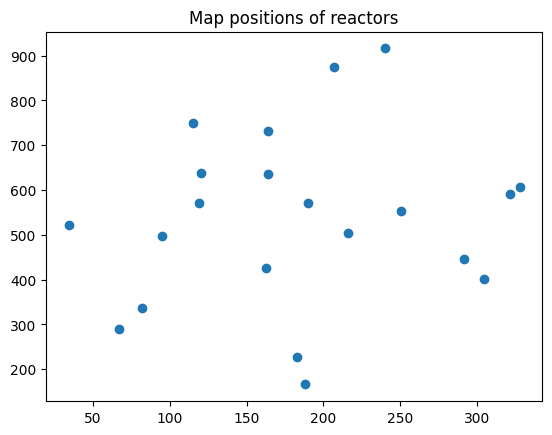

In [30]:
plt.scatter(summary['mapx'], summary['mapy'])
plt.title('Map positions of reactors')
plt.show()

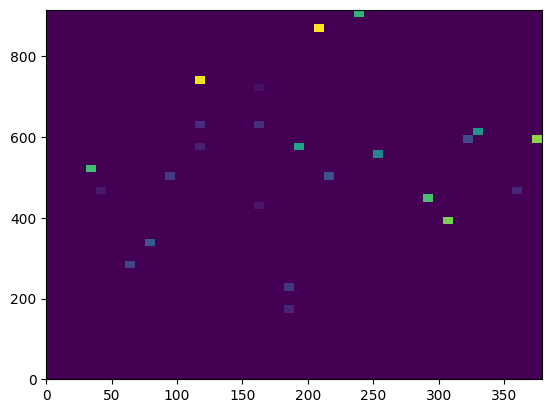

In [31]:
plt.hist2d(scorelog['mapx'], scorelog['mapy'], weights=scorelog['score'], density=False, bins=50)
plt.show()

In [32]:
# one entry per second per point captured

import numpy as np
from dataclasses import dataclass
from math import floor

@dataclass
class ScoreSecond:
    name: str
    sourcename: str
    when: datetime
    score: float
    once: bool
    mapx: int
    mapy: int

def row_to_scoreseconds(row, score_per):
    seconds = int(floor(row.score / score_per))
    assert row.score % score_per < 0.1
    when = int(floor(row.when.timestamp()))
    for elapsed in range(0, seconds):
        timestamp = pandas.Timestamp(when - elapsed, unit='s')
        yield ScoreSecond(name=row.name, sourcename=row.sourcename, mapx=row.mapx, mapy=row.mapy, when=timestamp, score=score_per, once=False)

def gen_scoreseconds():
    for row in scorelog.itertuples():
        if row.sourcename == "Capture":
            yield from row_to_scoreseconds(row, 1.0)
        elif row.sourcename == "Output Boost":
            yield from row_to_scoreseconds(row, 0.1)
        else: # one-off
            yield ScoreSecond(name=row.name, sourcename=row.sourcename, mapx=row.mapx, mapy=row.mapy, when=row.when, score=row.score, once=True)

scoreseconds = pandas.DataFrame(gen_scoreseconds())
scoreseconds.sort_values(by=['when'], inplace=True)
scoreseconds.reset_index(drop=True, inplace=True)
scoreseconds

name    sourcename                when  score   once  \
0                  Info Desk   First Visit 2025-08-08 20:14:00  100.0   True   
1                  Info Desk       Capture 2025-08-08 20:14:19    1.0  False   
2                  Info Desk       Capture 2025-08-08 20:14:20    1.0  False   
3                  Info Desk       Capture 2025-08-08 20:14:21    1.0  False   
4                  Info Desk       Capture 2025-08-08 20:14:22    1.0  False   
...                      ...           ...                 ...    ...    ...   
678874  Maker Days Eindhoven  Output Boost 2025-08-12 13:59:56    0.1  False   
678875  Maker Days Eindhoven  Output Boost 2025-08-12 13:59:57    0.1  False   
678876  Maker Days Eindhoven  Output Boost 2025-08-12 13:59:58    0.1  False   
678877  Maker Days Eindhoven  Output Boost 2025-08-12 13:59:59    0.1  False   
678878  Maker Days Eindhoven  Output Boost 2025-08-12 14:00:00    0.1  False   

        mapx  mapy  
0        216   505  
1        216   505  
2        216   505  
3        216   505  
4        216   505  
...      ...   ...  
678874   115   749  
678875   115   749  
678876   115   749  
678877   115   749  
678878   115   749  

[678879 rows x 7 columns]

In [33]:
acc_col = pandas.Series([0.0]).repeat(len(scoreseconds)).reset_index(drop=True)

acc = 0.0
for i, row in enumerate(scoreseconds.itertuples()):
    acc += row.score
    acc_col[i] = acc

scoreseconds['accumulated_score'] = acc_col
del acc
del acc_col

scoreseconds

name    sourcename                when  score   once  \
0                  Info Desk   First Visit 2025-08-08 20:14:00  100.0   True   
1                  Info Desk       Capture 2025-08-08 20:14:19    1.0  False   
2                  Info Desk       Capture 2025-08-08 20:14:20    1.0  False   
3                  Info Desk       Capture 2025-08-08 20:14:21    1.0  False   
4                  Info Desk       Capture 2025-08-08 20:14:22    1.0  False   
...                      ...           ...                 ...    ...    ...   
678874  Maker Days Eindhoven  Output Boost 2025-08-12 13:59:56    0.1  False   
678875  Maker Days Eindhoven  Output Boost 2025-08-12 13:59:57    0.1  False   
678876  Maker Days Eindhoven  Output Boost 2025-08-12 13:59:58    0.1  False   
678877  Maker Days Eindhoven  Output Boost 2025-08-12 13:59:59    0.1  False   
678878  Maker Days Eindhoven  Output Boost 2025-08-12 14:00:00    0.1  False   

        mapx  mapy  accumulated_score  
0        216   505         100.000000  
1        216   505         101.000000  
2        216   505         102.000000  
3        216   505         103.000000  
4        216   505         104.000000  
...      ...   ...                ...  
678874   115   749      589647.599999  
678875   115   749      589647.699999  
678876   115   749      589647.799999  
678877   115   749      589647.899999  
678878   115   749      589647.999999  

[678879 rows x 8 columns]

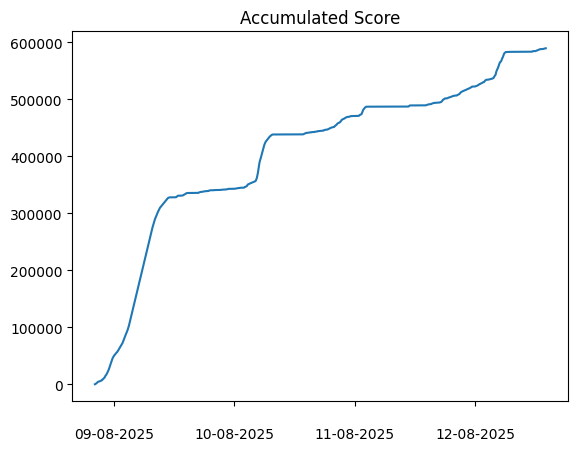

In [42]:
from matplotlib import dates

fig, ax = plt.subplots()
ax.plot('when', 'accumulated_score', data=scoreseconds, )
ax.xaxis.set_major_locator(dates.DayLocator(interval=1))    # every day
ax.xaxis.set_major_formatter(dates.DateFormatter('\n%d-%m-%Y'))
plt.title('Accumulated Score')
plt.show()